In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import numpy as np
from microjax.fastlens.mag_fft_jax import mag_limb, mag_disk
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_debug_nans", True)

import seaborn as sns
sns.set_theme(font="serif",font_scale=1.,style="ticks",)
from jax import jit, grad, vmap

In [2]:
magd_ = mag_disk()
magl_ = mag_limb()

magd = magd_.A
magl = magl_.A


def magl_scaler(u,rho,a1):
    mag_ = magl(u,rho,a1)
    return mag_[0]

def magd_scaler(u,rho,a1):
    mag_ = magd(u,rho,a1)
    return mag_[0]

I0000 00:00:1711695889.816748       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [3]:
magl_grad = jit(vmap(grad(magl_scaler,argnums=(0,1,2))))
magd_grad = jit(vmap(grad(magd_scaler,argnums=(0,1,2))))

rho_value = 1.0
a1=0.5
u   = jnp.linspace(1e-3,5,1000)
rho = jnp.ones(1000) * rho_value
a1  = jnp.ones(1000) * a1
magd_plot = jit(vmap(magd))(u,rho,a1) 
magl_plot = jit(vmap(magl))(u,rho,a1) 
magd_plot_grad = magd_grad(u,rho,a1)
magl_plot_grad = magl_grad(u,rho,a1)
a1=0.3
a1  = jnp.ones(1000) * a1
magl_plot_ = jit(vmap(magl))(u,rho,a1) 
magl_plot_grad_ = magl_grad(u,rho,a1)

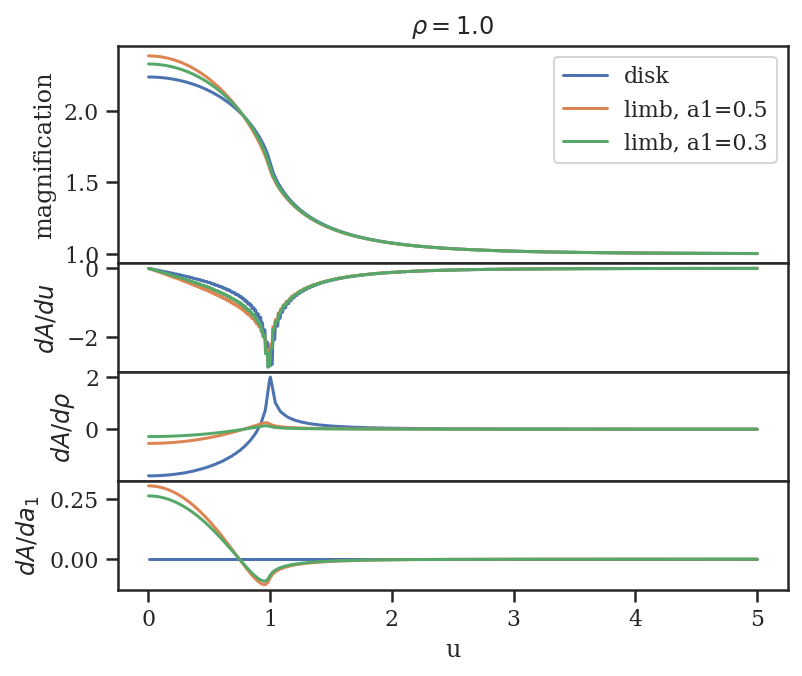

In [4]:
mosaic="""
AAAAA
AAAAA
BBBBB
CCCCC
DDDDD
"""

fig,ax = plt.subplot_mosaic(figsize=(6,5),mosaic=mosaic,sharex=True)
fig.subplots_adjust(hspace=0.0)
ax["A"].plot(u,jnp.ravel(magd_plot),label="disk")
ax["A"].plot(u,jnp.ravel(magl_plot),label="limb, a1=0.5")
ax["A"].plot(u,jnp.ravel(magl_plot_),label="limb, a1=0.3")
ax["A"].legend()
ax["A"].set_ylabel("magnification")
ax["B"].plot(u,magd_plot_grad[0].ravel(),"-")
ax["B"].plot(u,magl_plot_grad[0].ravel(),"-")
ax["B"].plot(u,magl_plot_grad_[0].ravel(),"-")
ax["C"].plot(u,magd_plot_grad[1].ravel(),"-")
ax["C"].plot(u,magl_plot_grad[1].ravel(),"-")
ax["C"].plot(u,magl_plot_grad_[1].ravel(),"-")
ax["D"].plot(u,magd_plot_grad[2].ravel(),"-")
ax["D"].plot(u,magl_plot_grad[2].ravel(),"-")
ax["D"].plot(u,magl_plot_grad_[2].ravel(),"-")
ax["B"].set_ylabel("$dA/du$")
ax["C"].set_ylabel("$dA/d\\rho$")
ax["D"].set_ylabel("$dA/da_1$")
ax["D"].set_xlabel("u")
ax["A"].set_title("$\\rho=1.0$")
#ax["D"].set_xscale("log")
plt.show()

In [5]:
u_grid = jnp.logspace(-5,0,50)
r_grid = jnp.logspace(-5,1,50)
a_grid = jnp.ones(50) * 0.5
u_grid, r_grid, a_grid = jnp.meshgrid(u_grid,r_grid, a_grid)
u_grid = u_grid.ravel()
r_grid = r_grid.ravel()
a_grid = a_grid.ravel()
result = magd_grad(u_grid,r_grid, a_grid)
result0 = jnp.array(result[0])
result1 = jnp.array(result[1])
result2 = jnp.array(result[2])

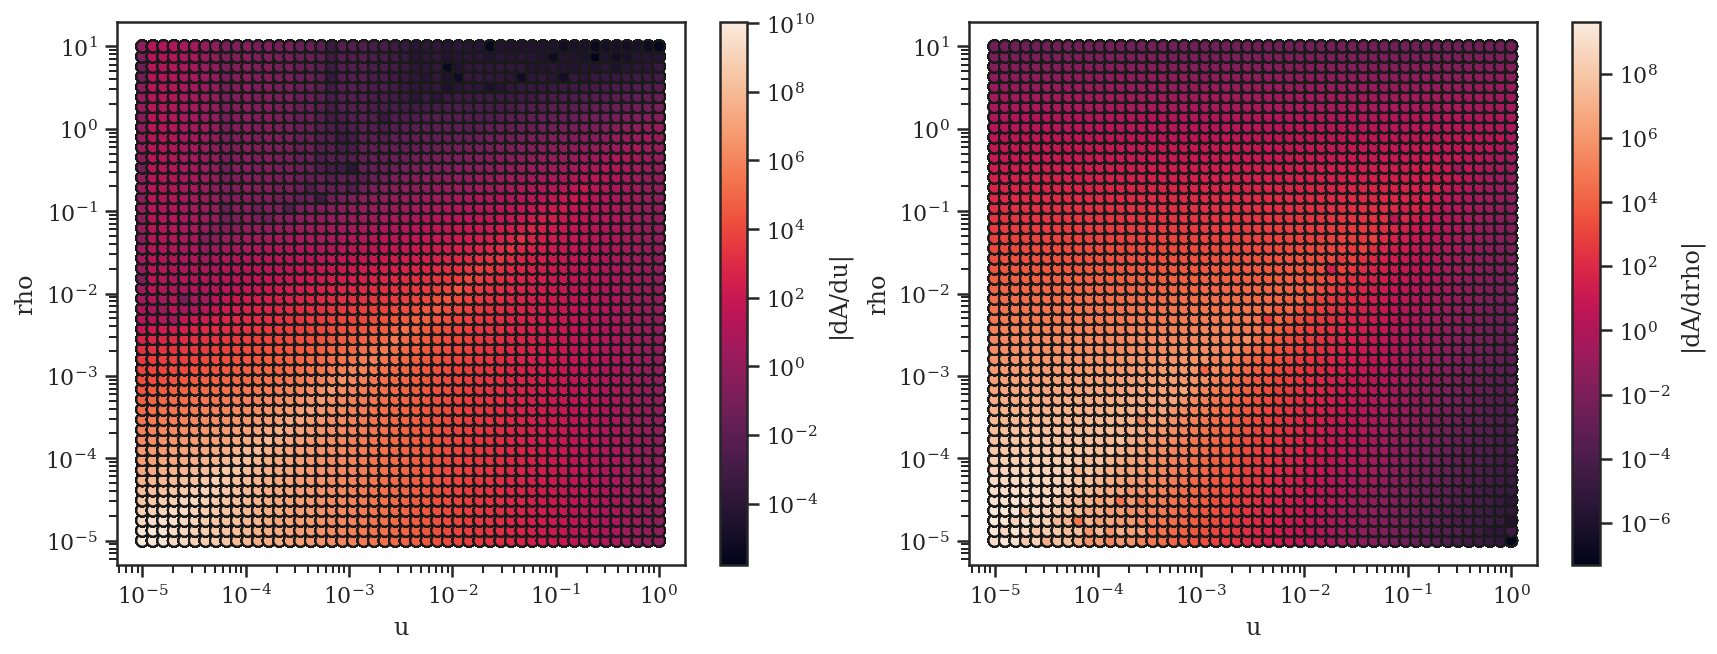

In [6]:
from matplotlib.colors import LogNorm
fig,ax = plt.subplots(1,2,figsize=(14,5))
sc = ax[0].scatter(u_grid,r_grid,c=np.abs(result0),norm=LogNorm(),ec="k")
ax[0].loglog()
cb0 = plt.colorbar(sc,ax=ax[0])
cb0.set_label("|dA/du|")
sc1 = ax[1].scatter(u_grid,r_grid,c=np.abs(result1),norm=LogNorm(),ec="k")
ax[1].loglog()
cb1 = plt.colorbar(sc1,ax=ax[1])
cb1.set_label("|dA/drho|")
ax[0].set_xlabel("u")
ax[0].set_ylabel("rho")
ax[1].set_xlabel("u")
ax[1].set_ylabel("rho")
plt.show()